# Machine Health Prediction

The aim is to find whether a machine is going to breakdown in near future or not based on the some parameters. 

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("predictive_maintenance.csv")

In [2]:
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9992 non-null   float64
 4   Process temperature [K]  9996 non-null   float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [5]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

# Data Preparation 

In [6]:
data.isnull().sum() #Checking the null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        8
Process temperature [K]    4
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
#Replacing the null values
mean=data["Air temperature [K]"].mean()
data["Air temperature [K]"].fillna(value=mean,inplace=True)

mean1=data["Process temperature [K]"].mean()
data["Process temperature [K]"].fillna(value=mean1,inplace=True)

In [8]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
#Finding the instances where the target is 0 but failure type is not "No failure"

mismatched=data[(data["Target"] == 0) & (data["Failure Type"] != "No Failure")]
mismatched.reset_index(drop=True)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0   1222     M16081    M                297.0                    308.3   
1   1303     L48482    L                298.6                    309.8   
2   1749     H31162    H                298.4                    307.7   
3   2073     L49252    L                299.6                    309.5   
4   2560     L49739    L                299.3                    309.0   
5   3066     M17925    M                300.1                    309.2   
6   3453     H32866    H                301.6                    310.5   
7   5472     L52651    L                302.7                    312.3   
8   5490     L52669    L                302.6                    312.1   
9   5496     H34909    H                302.9                    312.5   
10  5510     L52689    L                302.8                    312.2   
11  5554     L52733    L                302.5                    311.9   
12  5640     L52819    L                302.6                    312.1   
13  6092     L53271    L                300.9                    310.7   
14  6914     L54093    L                300.8                    311.2   
15  6961     L54140    L                300.7                    311.0   
16  7489     L54668    L                300.3                    311.7   
17  7869     H37282    H                300.4                    311.9   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                     1399         46.4              132       0   
1                     1505         45.7              144       0   
2                     1626         31.1              166       0   
3                     1570         35.5              189       0   
4                     1447         50.4              140       0   
5                     1687         27.7               95       0   
6                     1602         32.3                2       0   
7                     1346         61.2              170       0   
8                     1499         35.0              215       0   
9                     1357         55.0               12       0   
10                    1509         36.5               52       0   
11                    1306         59.7              172       0   
12                    1668         28.7              180       0   
13                    1412         57.5               16       0   
14                    1481         38.5              181       0   
15                    1413         52.0               91       0   
16                    1545         43.5              160       0   
17                    1438         46.7               41       0   

       Failure Type  
0   Random Failures  
1   Random Failures  
2   Random Failures  
3   Random Failures  
4   Random Failures  
5   Random Failures  
6   Random Failures  
7   Random Failures  
8   Random Failures  
9   Random Failures  
10  Random Failures  
11  Random Failures  
12  Random Failures  
13  Random Failures  
14  Random Failures  
15  Random Failures  
16  Random Failures  
17  Random Failures

In [10]:
#Finding the instances where the target is 1 but failure type is "No failure"

mismatched1=data[(data["Target"] == 1) & (data["Failure Type"] == "No Failure")]
mismatched1.reset_index(drop=True)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0  1438     H30851    H                298.8                    309.9   
1  2750     M17609    M                299.7                    309.2   
2  4045     M18904    M                301.9                    310.9   
3  4685     M19544    M                303.6                    311.8   
4  5537     M20396    M                302.3                    311.8   
5  5942     L53121    L                300.6                    310.7   
6  6479     L53658    L                300.5                    309.8   
7  8507     L55686    L                298.4                    309.6   
8  9016     L56195    L                297.2                    308.1   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1439         45.2               40       1   No Failure  
1                    1685         28.9              179       1   No Failure  
2                    1419         47.7               20       1   No Failure  
3                    1421         44.8              101       1   No Failure  
4                    1363         54.0              119       1   No Failure  
5                    1438         48.5               78       1   No Failure  
6                    1663         29.1              145       1   No Failure  
7                    1710         27.3              163       1   No Failure  
8                    1431         49.7              210       1   No Failure

In [11]:
#Changing the values of mismatched outputs

data.loc[data["Failure Type"] == "Random Failures","Target"]=1
data.loc[data["Failure Type"] == "No Failure","Target"] = 0

In [12]:
# Checking whether they are replaced or not

mismatched=data[(data["Target"] == 0) & (data["Failure Type"] != "No Failure")]
mismatched

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type]
Index: []

In [13]:
mismatched1=data[(data["Target"] == 1) & (data["Failure Type"] == "No Failure")]
mismatched1

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type]
Index: []

In [14]:
data["Target"].value_counts()

0    9652
1     348
Name: Target, dtype: int64

In [15]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

array([[<AxesSubplot:title={'center':'UDI'}>,
        <AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>,
        <AxesSubplot:title={'center':'Tool wear [min]'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

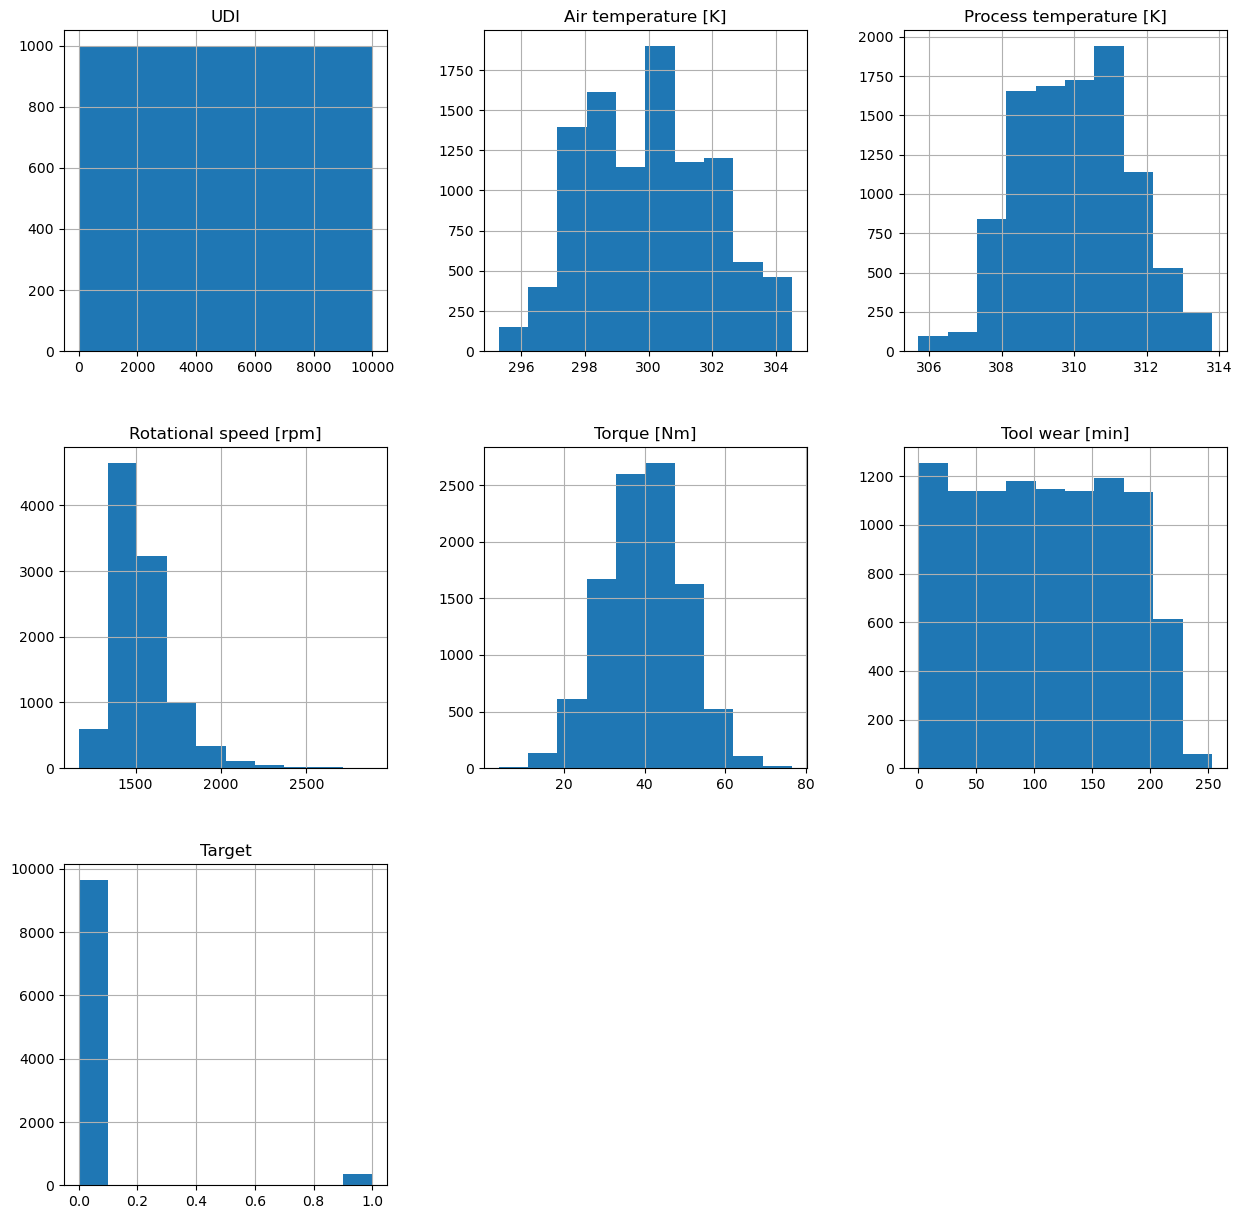

In [16]:
data.hist(figsize=(15,15))

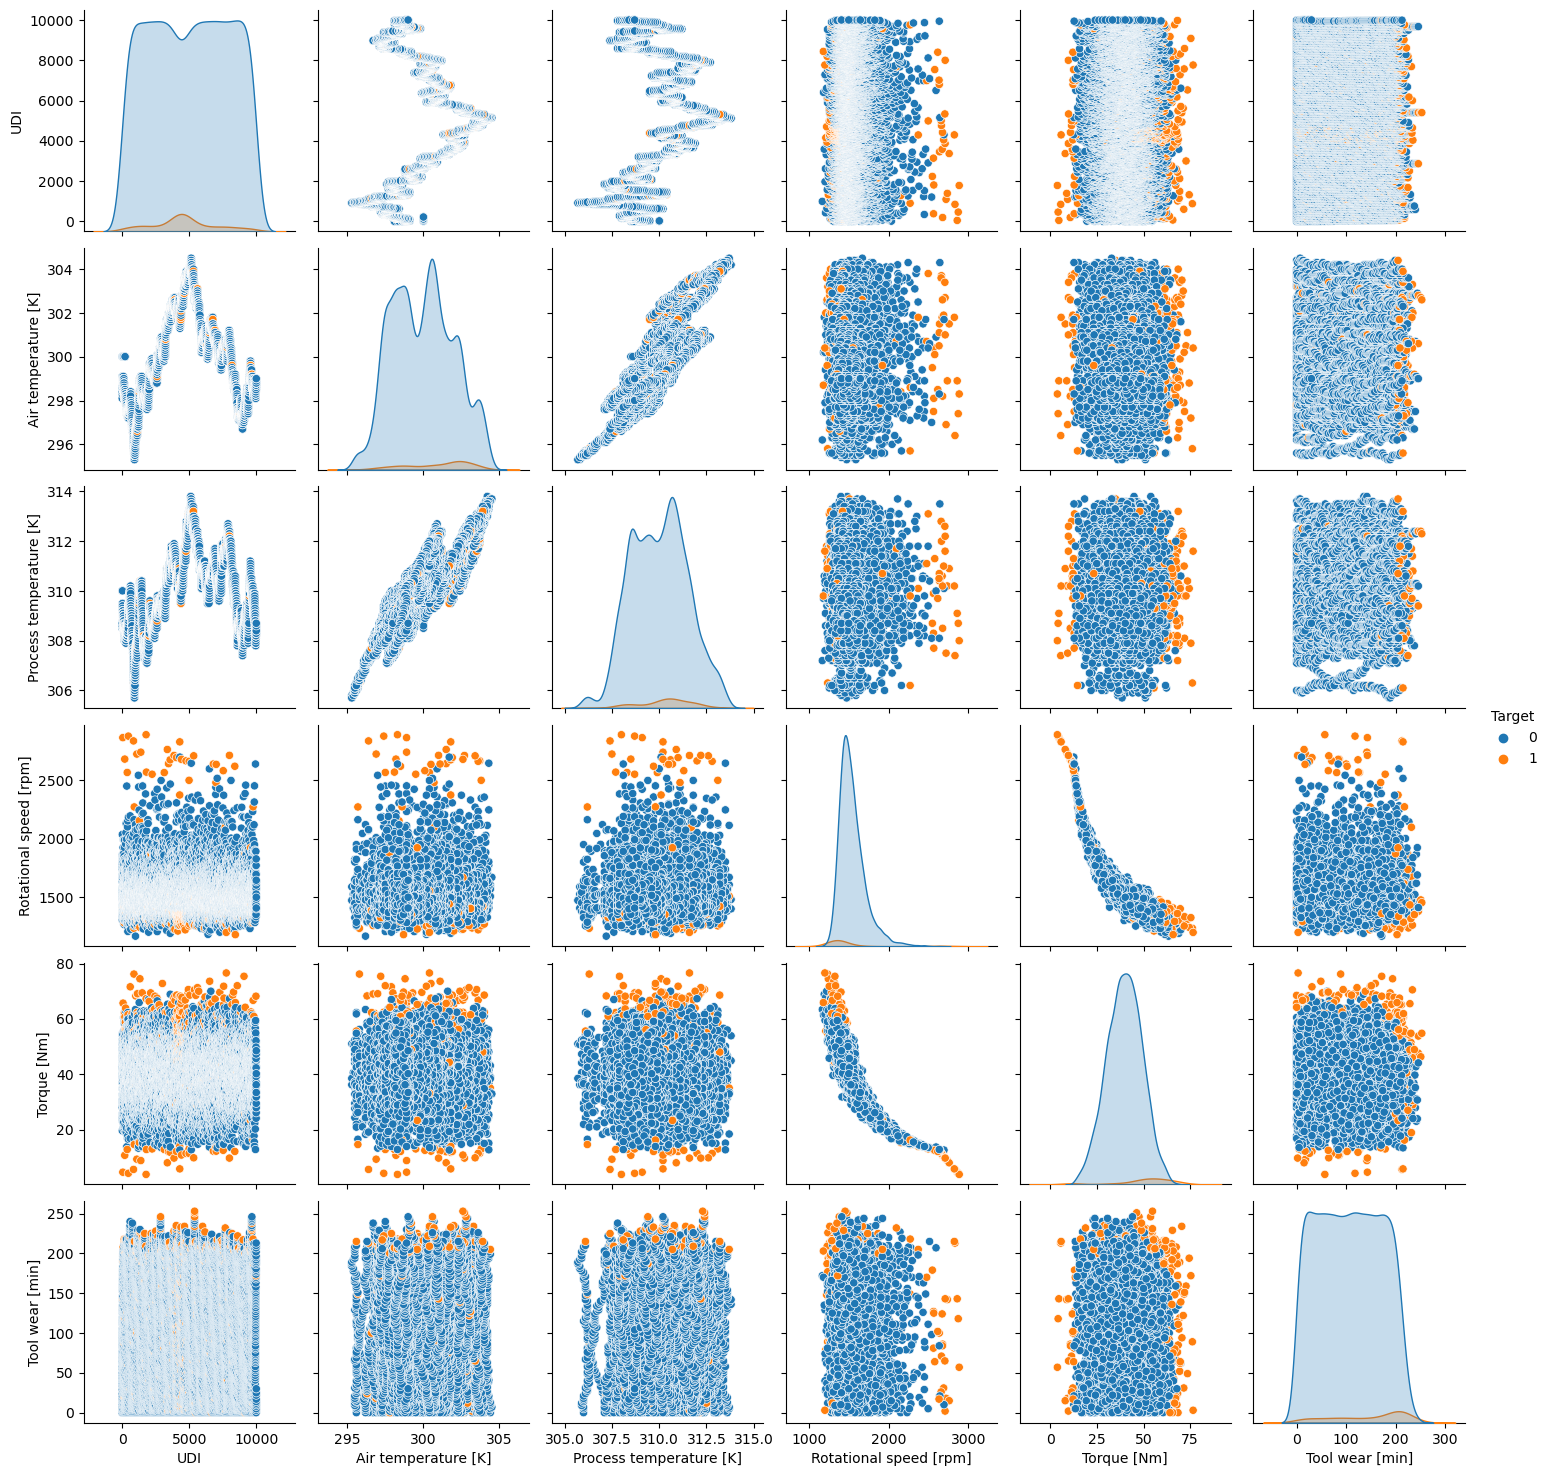

In [17]:
sns.pairplot(data,hue="Target")

In [18]:
# Resampling the data
from sklearn.utils import resample

failure1=data[data["Target"] == 1].reset_index(drop=True)
failure0=data[data["Target"] == 0].reset_index(drop=True)

#Over Sampling minority class
data_oversampled = resample(failure1,replace=True,n_samples=3000)

modified_data=pd.concat([failure0,data_oversampled])

In [19]:
#After resampling target values

modified_data["Target"].value_counts()

0    9652
1    3000
Name: Target, dtype: int64

In [20]:
modified_data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [21]:
modified_data.tail()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
55   2073     L49252    L                299.6                    309.5   
9     249     L47428    L                298.0                    308.3   
224  4815     L51994    L                303.4                    311.8   
178  4476     L51655    L                302.7                    310.5   
160  4384     L51563    L                301.7                    309.5   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
55                     1570         35.5              189       1   
9                      1362         56.8              216       1   
224                    1401         53.0              208       1   
178                    1351         41.8               10       1   
160                    1298         65.5              229       1   

                 Failure Type  
55            Random Failures  
9          Overstrain Failure  
224        Overstrain Failure  
178  Heat Dissipation Failure  
160  Heat Dissipation Failure

In [22]:
#Shuffling the modified data
from sklearn.utils import shuffle

shuffled_data=shuffle(modified_data)
shuffled_data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
7519  7826     M22685    M                299.9                    311.2   
3820  3924     M18783    M                302.6                    311.4   
7820  8134     L55313    L                299.8                    311.1   
1159  1193     M16052    M                297.2                    308.3   
2366  2432     M17291    M                298.9                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
7519                    1579         35.5              162       0   
3820                    1718         31.2              154       0   
7820                    1466         46.1               58       0   
1159                    1431         43.7               46       0   
2366                    1411         51.3               43       0   

     Failure Type  
7519   No Failure  
3820   No Failure  
7820   No Failure  
1159   No Failure  
2366   No Failure

In [23]:
#Failure types after over sampling

shuffled_data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     984
Power Failure                828
Overstrain Failure           632
Tool Wear Failure            406
Random Failures              150
Name: Failure Type, dtype: int64

# Visualization

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

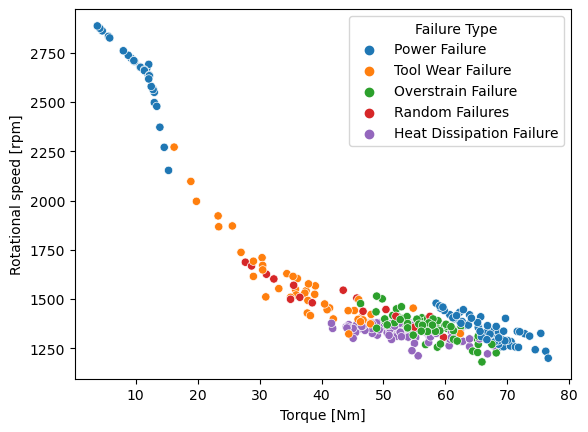

In [24]:
#Analysing Failure Types 
sns.scatterplot(data=failure1, x=failure1['Torque [Nm]'],y=failure1['Rotational speed [rpm]'],hue="Failure Type")

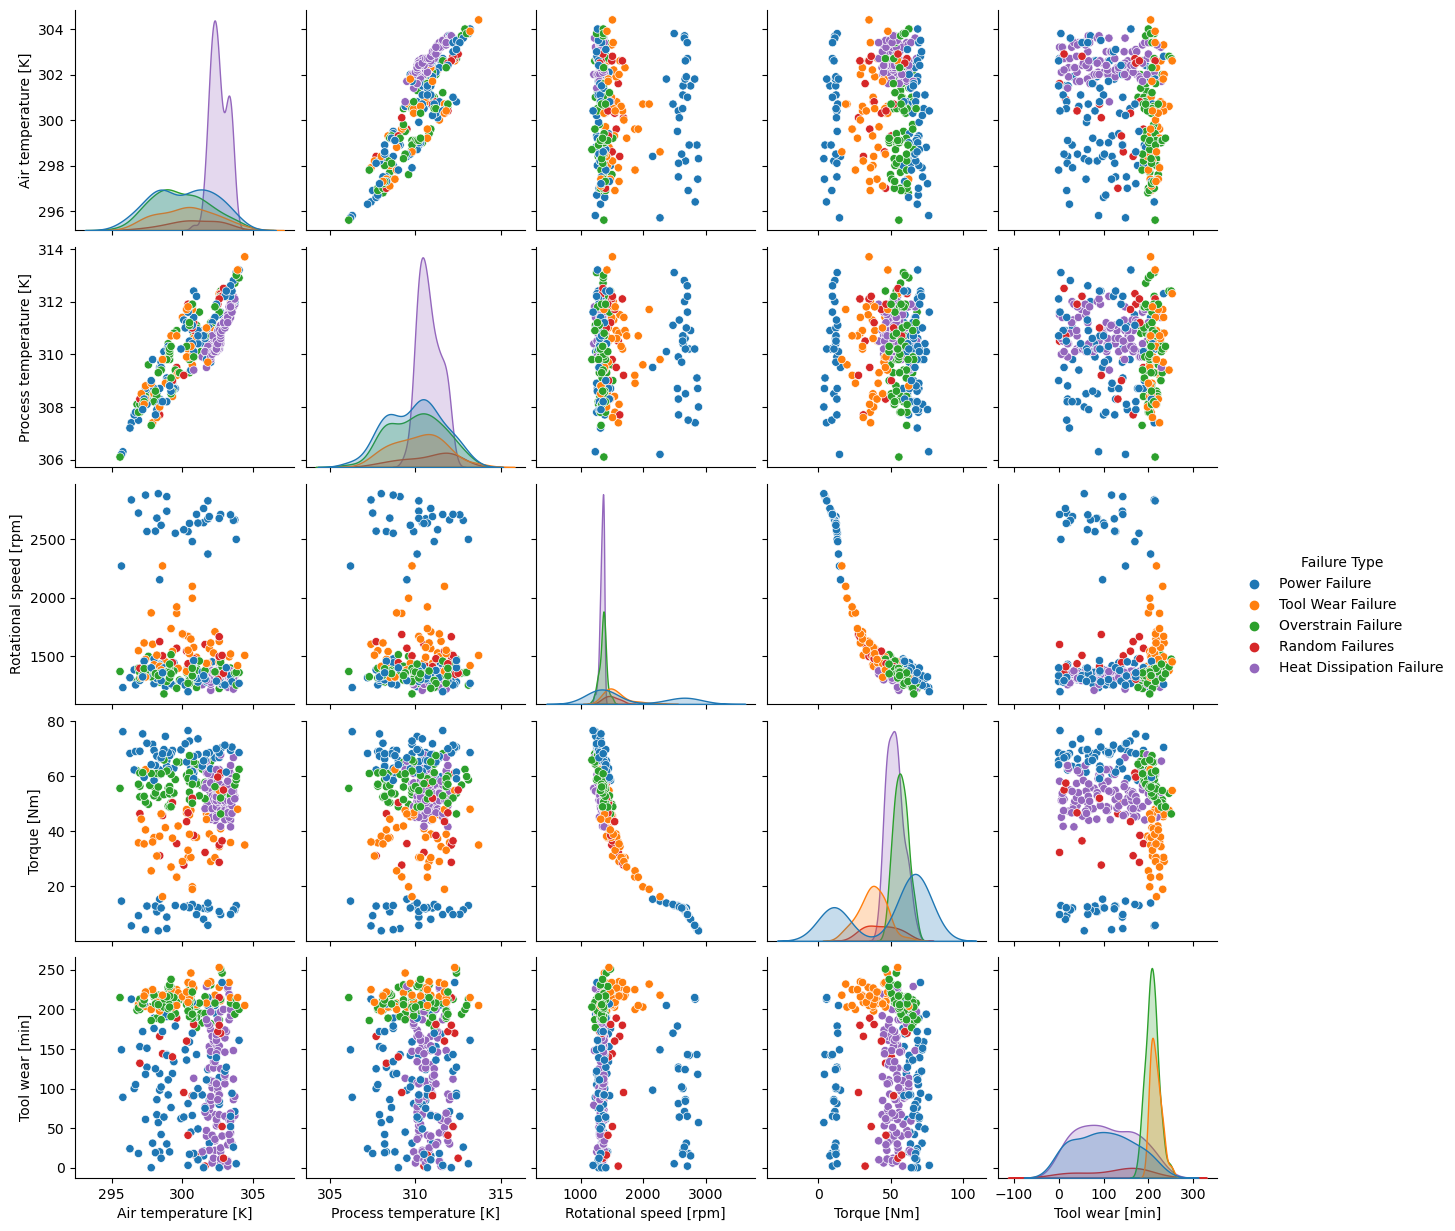

In [25]:
columns_to_plot = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

# Create pairplot
sns.pairplot(failure1[columns_to_plot + ["Failure Type"]], hue="Failure Type")
plt.show()

In [26]:
shuffled_data.drop(["Product ID"],axis=1,inplace=True)
shuffled_data

UDI Type  Air temperature [K]  Process temperature [K]  \
7519  7826    M                299.9                    311.2   
3820  3924    M                302.6                    311.4   
7820  8134    L                299.8                    311.1   
1159  1193    M                297.2                    308.3   
2366  2432    M                298.9                    308.2   
...    ...  ...                  ...                      ...   
768    788    L                296.9                    308.1   
243   5335    M                303.4                    312.6   
7152  7446    L                300.2                    311.7   
2904  2982    H                300.4                    309.4   
685    704    H                297.7                    308.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
7519                    1579         35.5              162       0   
3820                    1718         31.2              154       0   
7820                    1466         46.1               58       0   
1159                    1431         43.7               46       0   
2366                    1411         51.3               43       0   
...                      ...          ...              ...     ...   
768                     1435         45.3               62       0   
243                     2706          9.8               65       1   
7152                    1553         41.3               44       0   
2904                    1530         40.4              112       0   
685                     1479         40.9               87       0   

       Failure Type  
7519     No Failure  
3820     No Failure  
7820     No Failure  
1159     No Failure  
2366     No Failure  
...             ...  
768      No Failure  
243   Power Failure  
7152     No Failure  
2904     No Failure  
685      No Failure  

[12652 rows x 9 columns]

In [27]:
# shuffled_data.drop("Product ID",axis=1,inplace=True)

target1=shuffled_data["Target"]

failure_type1=shuffled_data["Failure Type"]

shuffled_data.drop('Target',axis=1,inplace=True)

shuffled_data.drop('Failure Type',axis=1,inplace=True)

encodeded_df = pd.get_dummies(shuffled_data)

encodeded_df

UDI  Air temperature [K]  Process temperature [K]  \
7519  7826                299.9                    311.2   
3820  3924                302.6                    311.4   
7820  8134                299.8                    311.1   
1159  1193                297.2                    308.3   
2366  2432                298.9                    308.2   
...    ...                  ...                      ...   
768    788                296.9                    308.1   
243   5335                303.4                    312.6   
7152  7446                300.2                    311.7   
2904  2982                300.4                    309.4   
685    704                297.7                    308.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Type_H  Type_L  \
7519                    1579         35.5              162       0       0   
3820                    1718         31.2              154       0       0   
7820                    1466         46.1               58       0       1   
1159                    1431         43.7               46       0       0   
2366                    1411         51.3               43       0       0   
...                      ...          ...              ...     ...     ...   
768                     1435         45.3               62       0       1   
243                     2706          9.8               65       0       0   
7152                    1553         41.3               44       0       1   
2904                    1530         40.4              112       1       0   
685                     1479         40.9               87       1       0   

      Type_M  
7519       1  
3820       1  
7820       0  
1159       1  
2366       1  
...      ...  
768        0  
243        1  
7152       0  
2904       0  
685        0  

[12652 rows x 9 columns]

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(encodeded_df)
scaled_data[0]

array([ 1.05605109, -0.14044821,  0.7742597 ,  0.20193214, -0.53112027,
        0.69582378, -0.32430111, -1.27942646,  1.58754894])

# Splitting Data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_data,target1,test_size=0.2, random_state=42)


# Model Selection

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

model=LogisticRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(accuracy_score(y_pred,y_test)*100)


85.30225207427894


In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2067
           1       0.58      0.75      0.65       464

    accuracy                           0.85      2531
   macro avg       0.76      0.81      0.78      2531
weighted avg       0.87      0.85      0.86      2531



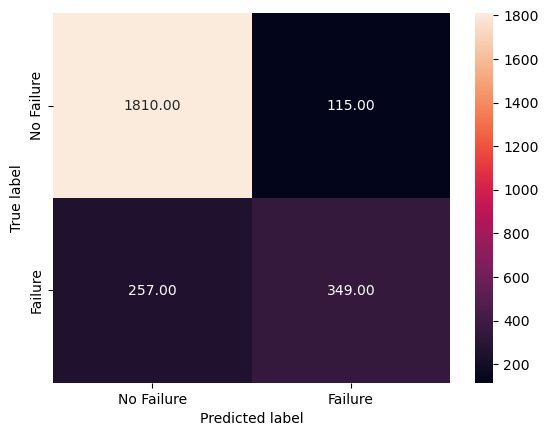

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [33]:
y_test.value_counts()

0    1925
1     606
Name: Target, dtype: int64

Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(accuracy_score(y_pred,y_test)*100)

98.77518767285657


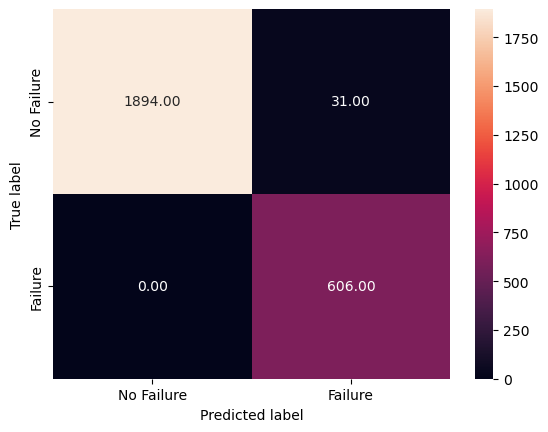

In [35]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1894
           1       1.00      0.95      0.98       637

    accuracy                           0.99      2531
   macro avg       0.99      0.98      0.98      2531
weighted avg       0.99      0.99      0.99      2531



Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(accuracy_score(y_pred,y_test)*100)

99.52587909917028


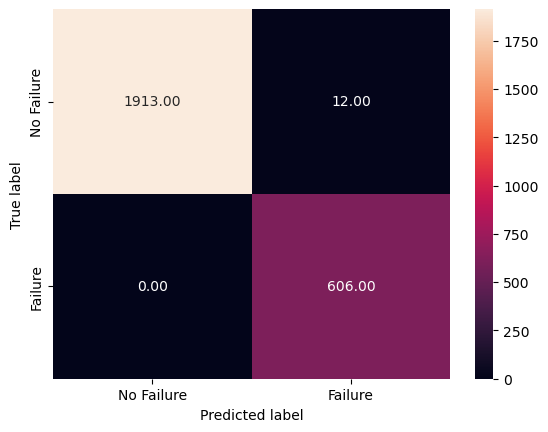

In [38]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['No Failure', 'Failure'], yticklabels = ['No Failure', 'Failure'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1913
           1       1.00      0.98      0.99       618

    accuracy                           1.00      2531
   macro avg       1.00      0.99      0.99      2531
weighted avg       1.00      1.00      1.00      2531



# Failure Type Prediction

In [40]:
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [41]:
df=data.drop(["UDI","Type","Target","Product ID"],axis=1)
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min] Failure Type  
0         42.8                0   No Failure  
1         46.3                3   No Failure  
2         49.4                5   No Failure  
3         39.5                7   No Failure  
4         40.0                9   No Failure

Exploratory Data Analysis

In [42]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [43]:
#Analysing the mean values of attributes for different failure types

df_means=df.groupby("Failure Type").mean()
df_means

Air temperature [K]  Process temperature [K]  \
Failure Type                                                             
Heat Dissipation Failure           302.567857               310.799107   
No Failure                         299.974000               309.994646   
Overstrain Failure                 299.867949               310.051282   
Power Failure                      300.075789               309.954737   
Random Failures                    300.766667               310.755556   
Tool Wear Failure                  300.288889               310.164444   

                          Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Failure Type                                                                    
Heat Dissipation Failure             1337.964286    52.778571       107.339286  
No Failure                           1540.324389    39.624316       106.678927  
Overstrain Failure                   1354.243590    56.878205       208.217949  
Power Failure                        1763.968421    48.514737       101.884211  
Random Failures                      1489.444444    43.522222       119.888889  
Tool Wear Failure                    1570.666667    37.226667       216.555556

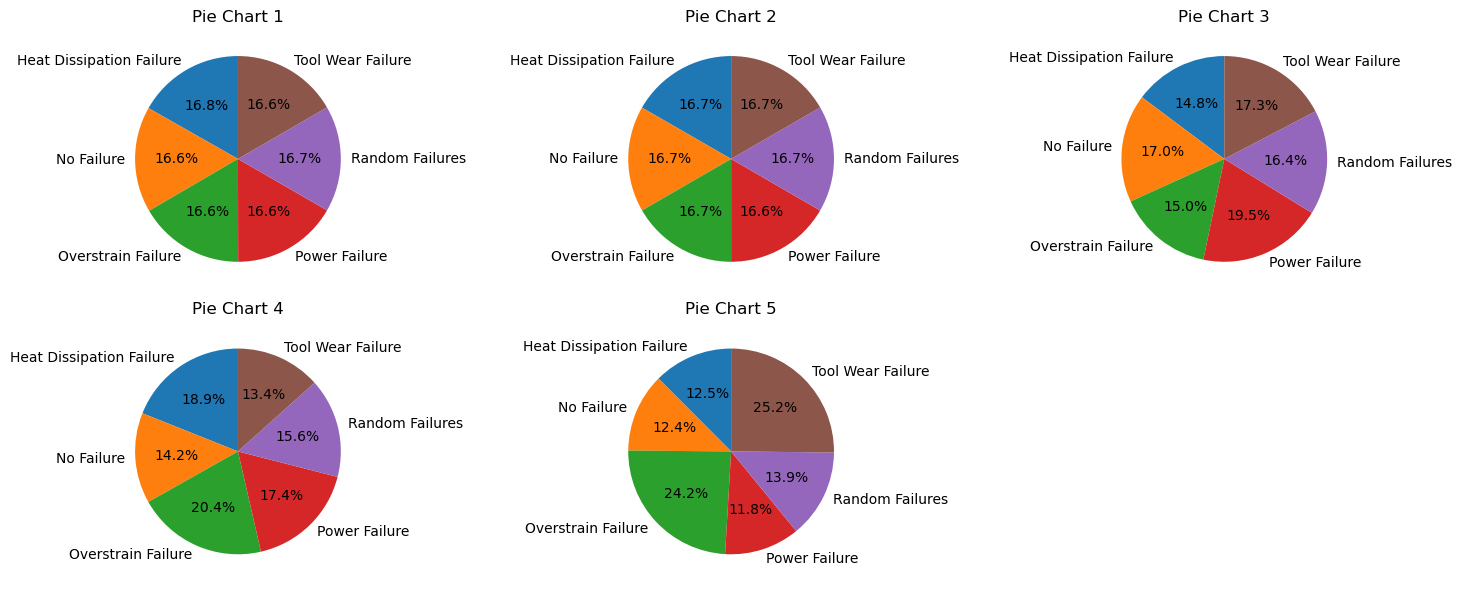

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# Plot the first pie chart in the first subplot
axs[0, 0].pie(df_means["Air temperature [K]"], labels=df_means.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Pie Chart 1')

# Plot the second pie chart in the second subplot
axs[0, 1].pie(df_means["Process temperature [K]"], labels=df_means.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Pie Chart 2')

# Plot the third pie chart in the third subplot
axs[0, 2].pie(df_means["Rotational speed [rpm]"], labels=df_means.index,autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('Pie Chart 3')

# Plot the fourth pie chart in the fourth subplot
axs[1, 0].pie(df_means["Torque [Nm]"], labels=df_means.index,autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Pie Chart 4')

# Plot the fifth pie chart in the fifth subplot
axs[1, 1].pie(df_means["Tool wear [min]"],labels=df_means.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Pie Chart 5')

# Hide the empty subplot in the last column and row
axs[1, 2].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

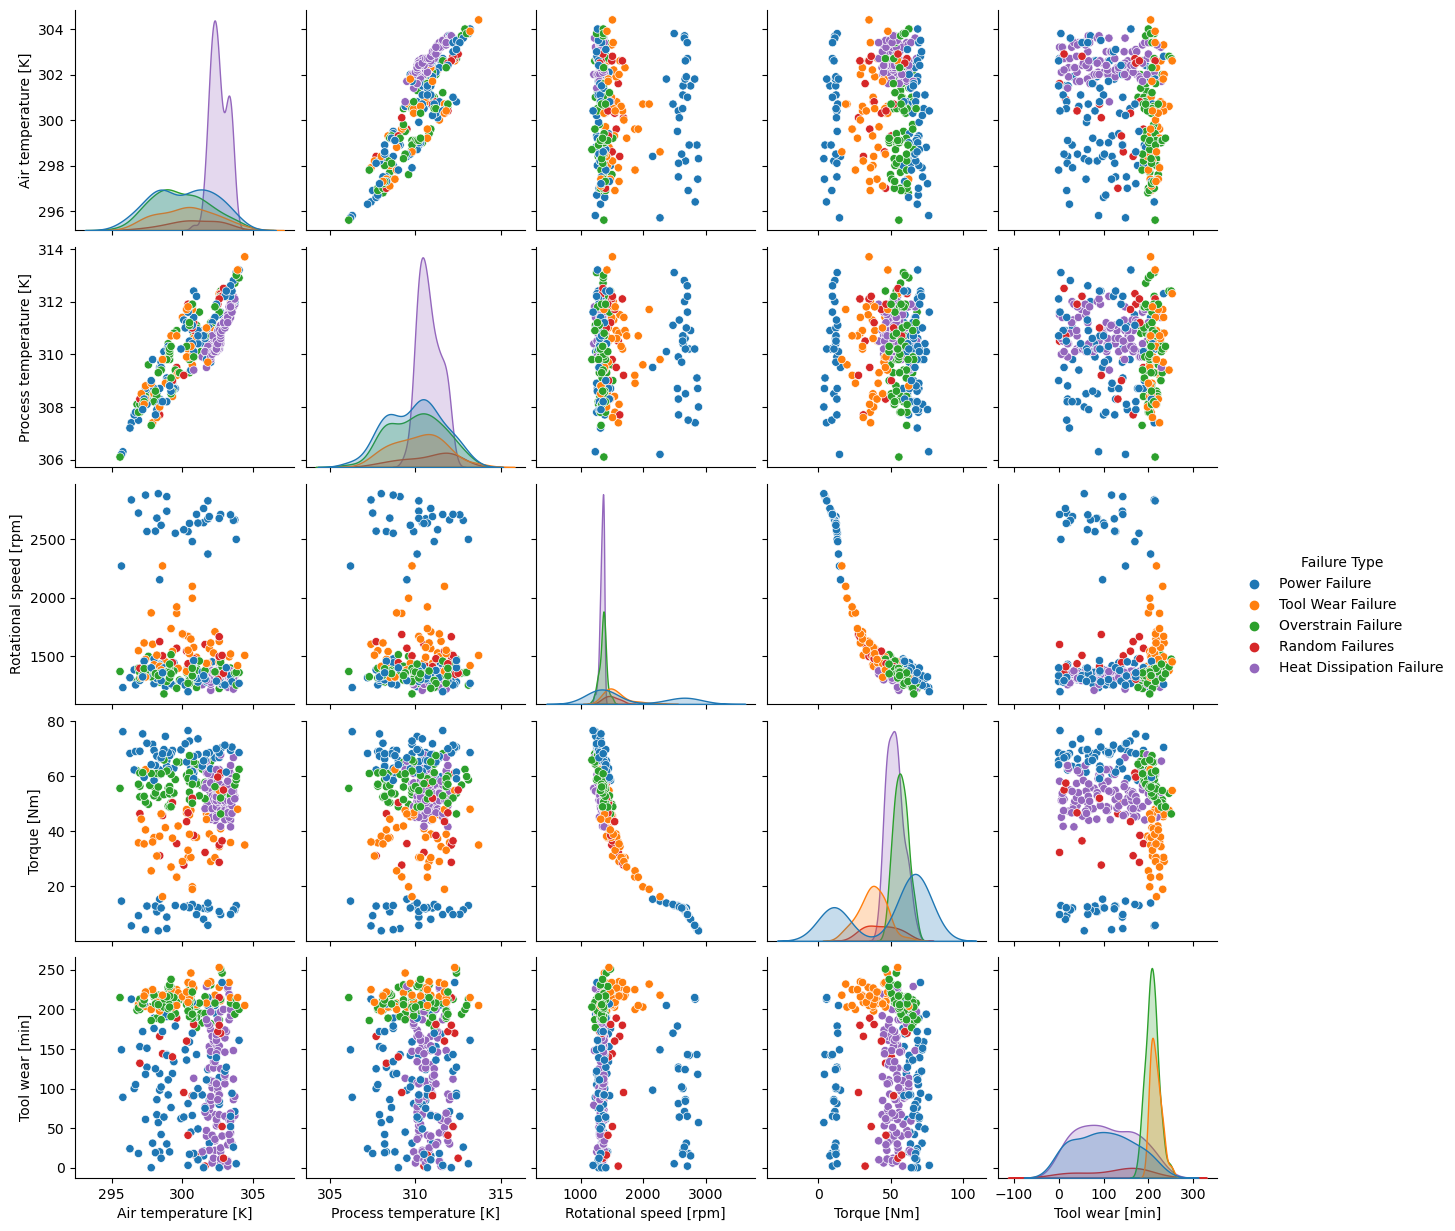

In [45]:
sns.pairplot(data=df[df["Failure Type"]!= "No Failure"] ,hue="Failure Type")

# Data splitting

In [46]:
from sklearn.model_selection import train_test_split

x_mul=df.drop("Failure Type",axis=1)
y_mul=df["Failure Type"]

x_train,x_test,y_train,y_test=train_test_split(x_mul,y_mul,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

# Encoding

In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1))
y_test = ohe.transform(y_test.values.reshape(-1, 1))

In [48]:
y_train = pd.DataFrame(y_train.toarray(), columns=ohe.categories_)
y_test = pd.DataFrame(y_test.toarray(), columns=ohe.categories_)
y_train.head(10)

Heat Dissipation Failure No Failure Overstrain Failure Power Failure  \
0                      0.0        1.0                0.0           0.0   
1                      0.0        1.0                0.0           0.0   
2                      0.0        1.0                0.0           0.0   
3                      0.0        1.0                0.0           0.0   
4                      0.0        1.0                0.0           0.0   
5                      0.0        1.0                0.0           0.0   
6                      0.0        1.0                0.0           0.0   
7                      0.0        1.0                0.0           0.0   
8                      0.0        1.0                0.0           0.0   
9                      0.0        1.0                0.0           0.0   

  Random Failures Tool Wear Failure  
0             0.0               0.0  
1             0.0               0.0  
2             0.0               0.0  
3             0.0               0.0  
4             0.0               0.0  
5             0.0               0.0  
6             0.0               0.0  
7             0.0               0.0  
8             0.0               0.0  
9             0.0               0.0

In [49]:
y_train.describe()

Heat Dissipation Failure   No Failure Overstrain Failure Power Failure  \
count              8000.000000  8000.000000        8000.000000   8000.000000   
mean                  0.012125     0.964625           0.008125      0.009375   
std                   0.109451     0.184737           0.089777      0.096376   
min                   0.000000     0.000000           0.000000      0.000000   
25%                   0.000000     1.000000           0.000000      0.000000   
50%                   0.000000     1.000000           0.000000      0.000000   
75%                   0.000000     1.000000           0.000000      0.000000   
max                   1.000000     1.000000           1.000000      1.000000   

      Random Failures Tool Wear Failure  
count     8000.000000       8000.000000  
mean         0.001500          0.004250  
std          0.038703          0.065057  
min          0.000000          0.000000  
25%          0.000000          0.000000  
50%          0.000000          0.000000  
75%          0.000000          0.000000  
max          1.000000          1.000000

In [50]:
y_train[y_train > 0.0].count()

Heat Dissipation Failure      97
No Failure                  7717
Overstrain Failure            65
Power Failure                 75
Random Failures               12
Tool Wear Failure             34
dtype: int64

# Scaling

In [51]:
x_train.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count          8000.000000              8000.000000             8000.000000   
mean            300.010967               310.006264             1538.776625   
std               2.001848                 1.486441              180.594083   
min             295.300000               305.700000             1181.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1502.000000   
75%             301.500000               311.100000             1611.250000   
max             304.500000               313.800000             2886.000000   

       Torque [Nm]  Tool wear [min]  
count  8000.000000      8000.000000  
mean     40.007800       108.068750  
std       9.979156        63.225052  
min       3.800000         0.000000  
25%      33.200000        53.000000  
50%      40.200000       108.000000  
75%      46.800000       162.000000  
max      76.200000       253.000000

In [52]:
from sklearn.preprocessing import StandardScaler

to_scale = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

sc = StandardScaler()
x_train[to_scale] = sc.fit_transform(x_train[to_scale])
x_test[to_scale] = sc.transform(x_test[to_scale])

In [53]:
x_train.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         8.000000e+03             8.000000e+03            8.000000e+03   
mean         -6.714717e-15            -7.770437e-15            1.481870e-16   
std           1.000063e+00             1.000063e+00            1.000063e+00   
min          -2.353456e+00            -2.897210e+00           -1.981233e+00   
25%          -8.547473e-01            -8.115620e-01           -6.411277e-01   
50%           4.447818e-02             6.306464e-02           -2.036552e-01   
75%           7.438758e-01             7.358543e-01            4.013305e-01   
max           2.242585e+00             2.552387e+00            7.460419e+00   

        Torque [Nm]  Tool wear [min]  
count  8.000000e+03     8.000000e+03  
mean  -3.075040e-16     8.115730e-17  
std    1.000063e+00     1.000063e+00  
min   -3.628570e+00    -1.709378e+00  
25%   -6.822446e-01    -8.710502e-01  
50%    1.926135e-02    -1.087453e-03  
75%    6.806813e-01     8.530578e-01  
max    3.627006e+00     2.292451e+00

# Model Training

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="micro")
    recall = recall_score(y_test, y_pred, average="micro")
    f1 = f1_score(y_test, y_pred, average="micro")
    
    return accuracy, precision, recall, f1

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

result = {}
for model,name in zip([knn, dtc, rfc],
                     ["KNN", "Decision Tree", "Random Forest"]):
    result[name] = fit_model(model, x_train, x_test, y_train, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
df_result = pd.DataFrame(np.array(list(result.values())),
                       columns= ["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"], 
                       index= result.keys())

df_result.index.name = "Model"   # name the index of the result1 dataframe as 'Model'
df_result

ACCURACY  PRECISION  RECALL  F1-SCORE
Model                                               
KNN              0.9705   0.976358  0.9705  0.973420
Decision Tree    0.9715   0.971500  0.9715  0.971500
Random Forest    0.9800   0.983442  0.9800  0.981718

# Hyperparameters Tuning

From above table the best model is seems to be exist with Random Forest

In [57]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "max_depth": [2, 4, 6, 8, 10, 12, 15, 20],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [2, 3, 4, 5, 6]
}

gs = GridSearchCV(dtc, grid_params, cv=5)
print(fit_model(gs, x_train, x_test, y_train, y_test))
print(f"Best model: {gs.best_estimator_}")

(0.9735, 0.9754509018036072, 0.9735, 0.9744744744744743)
Best model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)


[Text(0.5, 0.875, 'X[3] <= 2.5\ngini = 0.023\nsamples = 8000\nvalue = [[7903, 97]\n[283, 7717]\n[7935, 65]\n[7925, 75]\n[7988, 12]\n[7966, 34]]'),
 Text(0.25, 0.625, 'X[3] <= -2.692\ngini = 0.02\nsamples = 7950\nvalue = [[7856, 94]\n[241, 7709]\n[7891, 59]\n[7908, 42]\n[7938, 12]\n[7916, 34]]'),
 Text(0.125, 0.375, 'X[3] <= -2.747\ngini = 0.049\nsamples = 25\nvalue = [[25, 0]\n[23, 2]\n[25, 0]\n[2, 23]\n[25, 0]\n[25, 0]]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[2] <= -0.882\ngini = 0.018\nsamples = 7925\nvalue = [[7831, 94]\n[218, 7707]\n[7866, 59]\n[7906, 19]\n[7913, 12]\n[7891, 34]]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[2] <= -1.699\ngini = 0.174\nsamples = 50\nvalue = [[47, 3]\n[42, 8]\n[44, 6]\n[17, 33]\n[50, 0]\n[50, 0]]'),
 Text(0.625, 0.375, 'X[4] <= 0.379\ngini = 0.18\nsamples = 10\nvalue = [[9, 1]\n[4, 6]\n[7, 3]\n[10, 0]\n[10, 0]\n[10, 0]]'),
 Text(0

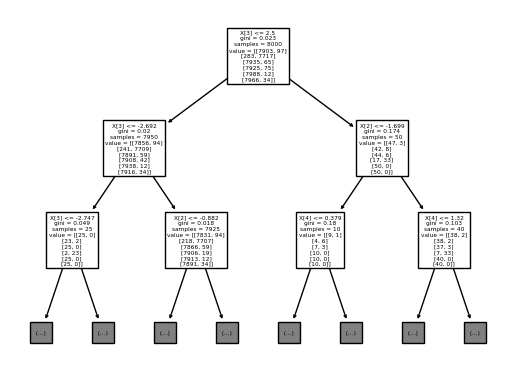

In [58]:
from sklearn.tree import plot_tree

plot_tree(gs.best_estimator_, max_depth=2)

In [59]:
y_preds = gs.best_estimator_.predict(x_test)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.99      0.99      0.99      1935
           2       0.45      0.38      0.42        13
           3       0.65      0.85      0.74        20
           4       0.00      0.00      0.00         6
           5       0.25      0.09      0.13        11

   micro avg       0.98      0.97      0.97      2000
   macro avg       0.50      0.53      0.51      2000
weighted avg       0.97      0.97      0.97      2000
 samples avg       0.97      0.97      0.97      2000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.values.argmax(axis=1), y_preds.argmax(axis=1))
print(matrix)

[[  13    2    0    0    0    0]
 [   9 1911    5    8    0    2]
 [   1    5    5    1    0    1]
 [   0    3    0   17    0    0]
 [   0    6    0    0    0    0]
 [   0    9    1    0    0    1]]
